In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
#Detection model
det_model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:01<00:00, 4.68MB/s]


In [5]:
# Perform object detection on an image using the model
img = 'kitchen.jpg'
detection_results = det_model.predict(img)


image 1/1 d:\IntegrationXpert\yolo v8\kitchen.jpg: 448x640 1 bottle, 3 chairs, 1 microwave, 1 oven, 1 refrigerator, 192.9ms
Speed: 11.2ms preprocess, 192.9ms inference, 8.8ms postprocess per image at shape (1, 3, 448, 640)


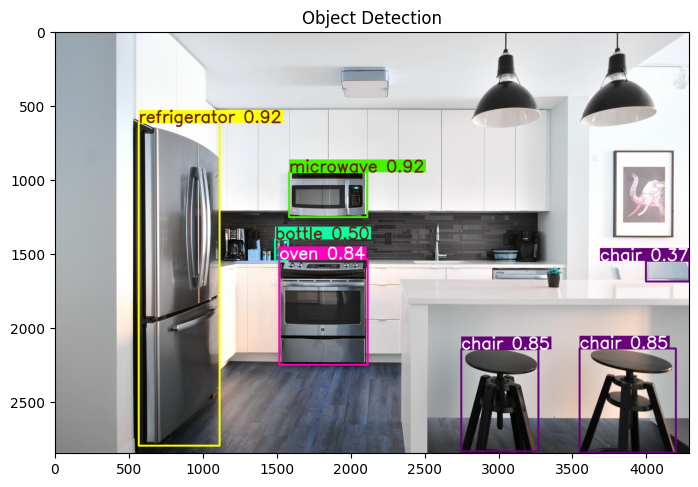

In [7]:
detection_result_array = detection_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)

In [8]:
#Number of bounding boxes (objects) detected in the image
result = detection_results[0]
len(result.boxes)

7

In [9]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 68.0
Coordinates: [1580.9346923828125, 952.1385498046875, 2108.344970703125, 1256.274169921875]
Probability: 0.9178394079208374
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 

In [16]:
from PIL import Image, ImageDraw, ImageFont
import os

# Define the path to the original image
original_image_path = "kitchen.jpg"

# Load the original image
original_image = Image.open(original_image_path)

# Set up a directory to save the cropped images
output_directory = "cropped_images"
os.makedirs(output_directory, exist_ok=True)

# Assuming `result` is your detection result object
for i, box in enumerate(result.boxes):
    cords = box.xyxy[0].tolist()
    class_id = box.cls[0].item()
    conf = box.conf[0].item()

    # Crop the image using the bounding box coordinates
    cropped_image = original_image.crop((cords[0], cords[1], cords[2], cords[3]))

    # Draw the text on the cropped image
    draw = ImageDraw.Draw(cropped_image)
    text = f"{result.names[class_id]}: {conf:.2f}"

    # Choose a font and size
    try:
        font = ImageFont.truetype("arial.ttf", 10)
    except IOError:
        font = ImageFont.load_default()

    # Get the text size using textbbox
    text_bbox = draw.textbbox((10, 10), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Position the text and draw a rectangle for better visibility
    text_position = (10, 10)  # Text position (x, y)
    background_position = (text_position[0], text_position[1], text_position[0] + text_width, text_position[1] + text_height)
    
    # Draw a background rectangle for better text visibility
    draw.rectangle(background_position, fill="black")
    
    # Draw the text on the image
    draw.text(text_position, text, fill="white", font=font)

    # Define the output path for the cropped image
    output_path = os.path.join(output_directory, f"object_{i+1}_{result.names[class_id]}.jpg")
    cropped_image.save(output_path)

    # Print the details
    print(f"Object type: {result.names[class_id]}")
    print(f"Coordinates: {cords}")
    print(f"Probability: {conf}")
    print(f"Cropped image saved as: {output_path}")

print("All detected objects have been cropped, annotated, and saved.")


Object type: microwave
Coordinates: [1580.9346923828125, 952.1385498046875, 2108.344970703125, 1256.274169921875]
Probability: 0.9178394079208374
Cropped image saved as: cropped_images\object_1_microwave.jpg
Object type: refrigerator
Coordinates: [565.2767333984375, 618.9342041015625, 1111.0625, 2798.18115234375]
Probability: 0.9158982038497925
Cropped image saved as: cropped_images\object_2_refrigerator.jpg
Object type: chair
Coordinates: [3542.500732421875, 2142.320556640625, 4192.6611328125, 2845.86279296875]
Probability: 0.8536537885665894
Cropped image saved as: cropped_images\object_3_chair.jpg
Object type: chair
Coordinates: [2743.471435546875, 2147.61474609375, 3264.1826171875, 2836.52880859375]
Probability: 0.8491764068603516
Cropped image saved as: cropped_images\object_4_chair.jpg
Object type: oven
Coordinates: [1514.9969482421875, 1539.781005859375, 2111.1923828125, 2252.2734375]
Probability: 0.843461275100708
Cropped image saved as: cropped_images\object_5_oven.jpg
Object 